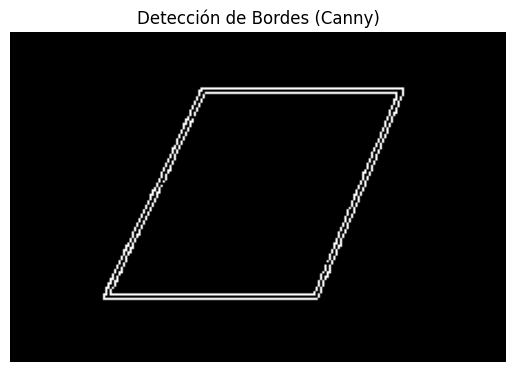

True

In [5]:
import cv2
import matplotlib.pyplot as plt


# Cargar la imagen en escala de grises
image = cv2.imread('data/Input/romboide-sucio.png', cv2.IMREAD_GRAYSCALE)

# Aplicar el filtro de detección de bordes (Canny)
edges = cv2.Canny(image, 100, 200)

plt.title('Detección de Bordes (Canny)')
plt.imshow(edges , cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Guardar la imagen filtrada
cv2.imwrite('data/generated/romboide_bordes.jpg', edges)